In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data Preprocessing

In [52]:
df = pd.read_csv('files/general_data.csv', parse_dates=['Data'], index_col='Data')
df = df.rename_axis('Date')
df.rename(columns={'Osoby': 'Unemployed'}, inplace=True)
df

,Unemployed
Date,
2011-01-01,2104986
2011-02-01,2150233
2011-03-01,2133916
2011-04-01,2043516
2011-05-01,1962587
...,...
2023-09-01,775987
2023-10-01,770446
2023-11-01,773403


In [53]:
import yfinance as yf

# Symbol dla złota na Yahoo Finance to "GC=F"
symbol = 'GC=F'

# Pobranie danych historycznych z ostatnich 10 lat
gold = yf.download(symbol, start='2010-12-30', end='2024-03-25')
gold.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-30,1413.800049,1413.800049,1403.099976,1405.599976,1405.599976,185
2010-12-31,1405.699951,1421.099976,1405.699951,1421.099976,1421.099976,54
2011-01-03,1415.599976,1423.900024,1413.699951,1422.599976,1422.599976,28
2011-01-04,1409.599976,1410.900024,1375.800049,1378.500000,1378.500000,122
2011-01-05,1383.400024,1384.000000,1364.199951,1373.400024,1373.400024,175


In [54]:
gold_day1 = gold.loc[gold.index.day == 1]
gold_day1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-02-01,1333.099976,1342.900024,1325.300049,1339.599976,1339.599976,3180
2011-03-01,1415.300049,1434.400024,1415.300049,1430.699951,1430.699951,116
2011-04-01,1433.400024,1436.500000,1413.000000,1428.099976,1428.099976,5318
2011-06-01,1535.699951,1550.599976,1529.699951,1542.400024,1542.400024,2845
2011-07-01,1502.199951,1502.199951,1480.000000,1482.300049,1482.300049,66


In [55]:
combined = pd.concat([df, gold_day1['Close']], axis=1)
combined

,Unemployed,Close
Date,,
2011-01-01,2104986.0,NaN
2011-02-01,2150233.0,1339.599976
2011-03-01,2133916.0,1430.699951
2011-04-01,2043516.0,1428.099976
2011-05-01,1962587.0,NaN
...,...,...
2023-11-01,773403.0,1978.800049
2023-12-01,788229.0,2071.000000
2024-01-01,837063.0,NaN


In [56]:
usd_pln = pd.read_excel('files/USD_PLN.xlsx', sheet_name = 0, parse_dates=['Data'], index_col='Data')
usd_pln.head()

,Ostatnio,Otwarcie,Max.,Min.,Wol.,Zmiana%
Data,,,,,,
2024-02-29,3.9910,3.9856,4.0025,3.9750,NaN,0.0022
2024-02-28,3.9822,3.9702,3.9944,3.9678,NaN,0.0039
2024-02-27,3.9669,3.9717,3.9850,3.9594,NaN,-0.0004
2024-02-26,3.9686,3.9839,3.9918,3.9620,NaN,-0.0018
2024-02-23,3.9756,3.9955,4.0101,3.9755,NaN,-0.0047


In [57]:
usd_day1 = usd_pln.loc[usd_pln.index.day == 1]
usd_day1.head()

,Ostatnio,Otwarcie,Max.,Min.,Wol.,Zmiana%
Data,,,,,,
2024-02-01,3.9664,4.0016,4.0250,3.9653,NaN,-0.0082
2024-01-01,3.9369,3.9368,3.9416,3.9337,NaN,0.0010
2023-12-01,3.9700,4.0004,4.0119,3.9664,NaN,-0.0071
2023-11-01,4.2199,4.2116,4.2547,4.2038,NaN,0.0027
2023-09-01,4.1414,4.1262,4.1494,4.1037,NaN,0.0044


In [58]:
combined = pd.concat([combined, usd_day1['Ostatnio']], axis=1)
combined

,Unemployed,Close,Ostatnio
2011-01-01,2104986.0,NaN,NaN
2011-02-01,2150233.0,1339.599976,2.8199
2011-03-01,2133916.0,1430.699951,2.8954
2011-04-01,2043516.0,1428.099976,2.8224
2011-05-01,1962587.0,NaN,NaN
...,...,...,...
2023-11-01,773403.0,1978.800049,4.2199
2023-12-01,788229.0,2071.000000,3.9700
2024-01-01,837063.0,NaN,3.9369
2024-02-01,NaN,2053.000000,3.9664


In [59]:
import yfinance as yf

# Pobranie danych historycznych z ostatnich 10 lat
brent_oil = yf.download("BZ=F", start='2011-01-01', end='2024-03-25')
brent_oil.head()
brent_oil.rename(columns={'Close': 'Close (Oil)'}, inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [60]:
oil_day1 = brent_oil.loc[brent_oil.index.day == 1]
oil_day1.head()

,Open,High,Low,Close (Oil),Adj Close,Volume
Date,,,,,,
2011-02-01,100.489998,102.040001,100.419998,101.739998,101.739998,1352
2011-03-01,112.370003,116.699997,111.940002,115.419998,115.419998,1160
2011-04-01,117.790001,118.849998,116.839996,118.699997,118.699997,896
2011-06-01,115.970001,116.160004,114.500000,114.529999,114.529999,537
2011-07-01,110.580002,111.849998,109.940002,111.769997,111.769997,651


In [61]:
combined = pd.concat([combined, oil_day1['Close (Oil)']], axis=1)
combined

,Unemployed,Close,Ostatnio,Close (Oil)
2011-01-01,2104986.0,NaN,NaN,NaN
2011-02-01,2150233.0,1339.599976,2.8199,101.739998
2011-03-01,2133916.0,1430.699951,2.8954,115.419998
2011-04-01,2043516.0,1428.099976,2.8224,118.699997
2011-05-01,1962587.0,NaN,NaN,NaN
...,...,...,...,...
2023-11-01,773403.0,1978.800049,4.2199,84.629997
2023-12-01,788229.0,2071.000000,3.9700,78.879997
2024-01-01,837063.0,NaN,3.9369,NaN
2024-02-01,NaN,2053.000000,3.9664,78.699997


In [62]:
tourists = pd.read_csv('files/tourists_mod.csv', parse_dates=['Data'], index_col='Data')
tourists.head()

,Turysci
Data,
2011-01-01,1215786
2012-01-01,1360960
2013-01-01,1352509
2014-01-01,1415184
2015-01-01,1518140


In [63]:
tourists.rename(columns={'Turysci': 'Tourists'}, inplace=True)

In [64]:
combined = pd.concat([combined, tourists['Tourists']], axis=1)
combined

,Unemployed,Close,Ostatnio,Close (Oil),Tourists
2011-01-01,2104986.0,NaN,NaN,NaN,1215786.0
2011-02-01,2150233.0,1339.599976,2.8199,101.739998,1232497.0
2011-03-01,2133916.0,1430.699951,2.8954,115.419998,1449978.0
2011-04-01,2043516.0,1428.099976,2.8224,118.699997,1510034.0
2011-05-01,1962587.0,NaN,NaN,NaN,2006688.0
...,...,...,...,...,...
2023-11-01,773403.0,1978.800049,4.2199,84.629997,2526391.0
2023-12-01,788229.0,2071.000000,3.9700,78.879997,2472961.0
2024-01-01,837063.0,NaN,3.9369,NaN,2232273.0
2024-02-01,NaN,2053.000000,3.9664,78.699997,NaN


In [65]:
combined.rename(columns={'Close': 'Close (Gold)', 'Ostatnio': 'Close (USD)'}, inplace=True)

In [66]:
combined = combined.drop(['2011-01-01', '2024-02-01', '2024-03-01'])
combined

,Unemployed,Close (Gold),Close (USD),Close (Oil),Tourists
2011-02-01,2150233.0,1339.599976,2.8199,101.739998,1232497.0
2011-03-01,2133916.0,1430.699951,2.8954,115.419998,1449978.0
2011-04-01,2043516.0,1428.099976,2.8224,118.699997,1510034.0
2011-05-01,1962587.0,NaN,NaN,NaN,2006688.0
2011-06-01,1883299.0,1542.400024,2.7660,114.529999,2254963.0
...,...,...,...,...,...
2023-09-01,775987.0,1939.800049,4.1414,88.550003,3568440.0
2023-10-01,770446.0,NaN,NaN,NaN,2983069.0
2023-11-01,773403.0,1978.800049,4.2199,84.629997,2526391.0
2023-12-01,788229.0,2071.000000,3.9700,78.879997,2472961.0


In [67]:
combined.isna().sum()

Unemployed       0
Close (Gold)    54
Close (USD)     44
Close (Oil)     55
Tourists         0
dtype: int64

In [68]:
interpolated = combined.interpolate()
interpolated

,Unemployed,Close (Gold),Close (USD),Close (Oil),Tourists
2011-02-01,2150233.0,1339.599976,2.81990,101.739998,1232497.0
2011-03-01,2133916.0,1430.699951,2.89540,115.419998,1449978.0
2011-04-01,2043516.0,1428.099976,2.82240,118.699997,1510034.0
2011-05-01,1962587.0,1485.250000,2.79420,116.614998,2006688.0
2011-06-01,1883299.0,1542.400024,2.76600,114.529999,2254963.0
...,...,...,...,...,...
2023-09-01,775987.0,1939.800049,4.14140,88.550003,3568440.0
2023-10-01,770446.0,1959.300049,4.18065,86.590000,2983069.0
2023-11-01,773403.0,1978.800049,4.21990,84.629997,2526391.0
2023-12-01,788229.0,2071.000000,3.97000,78.879997,2472961.0


In [69]:
interpolated.isna().any()

Unemployed      False
Close (Gold)    False
Close (USD)     False
Close (Oil)     False
Tourists        False
dtype: bool

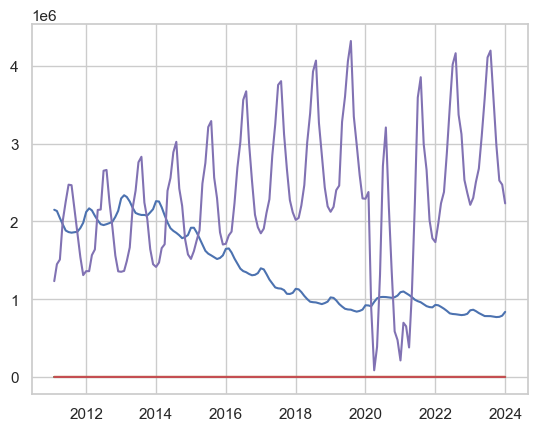

In [70]:
plt.plot(interpolated)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(interpolated)
scaled_df = pd.DataFrame(scaled, columns=interpolated.columns, index=interpolated.index)
scaled_df

,Unemployed,Close (Gold),Close (USD),Close (Oil),Tourists
2011-02-01,1.536423,-0.614140,-1.928724,0.919501,-1.266759
2011-03-01,1.503964,-0.280834,-1.758497,1.446586,-1.014713
2011-04-01,1.324137,-0.290346,-1.923087,1.572962,-0.945112
2011-05-01,1.163150,-0.081252,-1.986668,1.492628,-0.369523
2011-06-01,1.005427,0.127842,-2.050250,1.412294,-0.081788
...,...,...,...,...,...
2023-09-01,-1.197282,1.581804,1.050808,0.411296,1.440445
2023-10-01,-1.208304,1.653149,1.139304,0.335778,0.762039
2023-11-01,-1.202422,1.724493,1.227799,0.260260,0.232779
2023-12-01,-1.172930,2.061824,0.664360,0.038715,0.170857


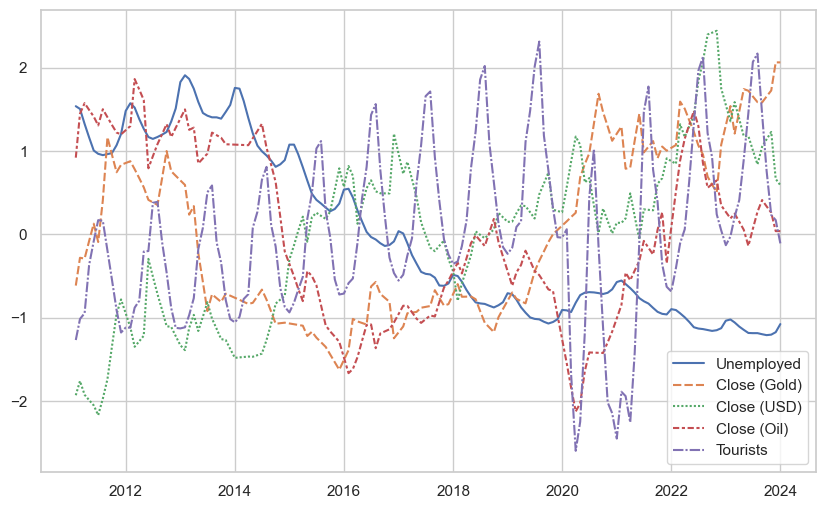

In [72]:
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=[10, 6])
sns.lineplot(scaled_df, ax=ax)
plt.show()

# SHAP

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [74]:
# all variables will be predicators
X = scaled_df.drop(columns=['Unemployed']) 
y = scaled_df['Unemployed'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# evaluate model on test set
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.29512766110945493


In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 4), (32, 4), (124,), (32,))

In [76]:
res = pd.DataFrame(y_test)
res['y_pred'] = y_pred

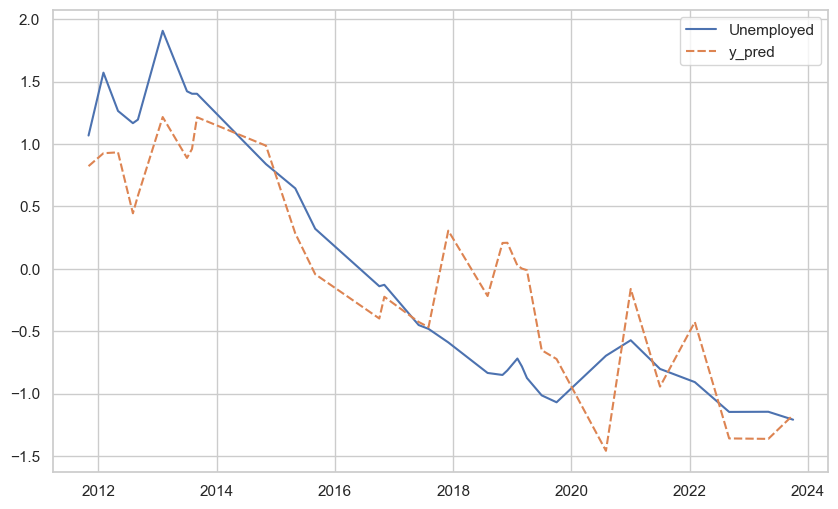

In [77]:
fig, ax = plt.subplots(figsize=[10, 6])
sns.lineplot(res)
plt.show()

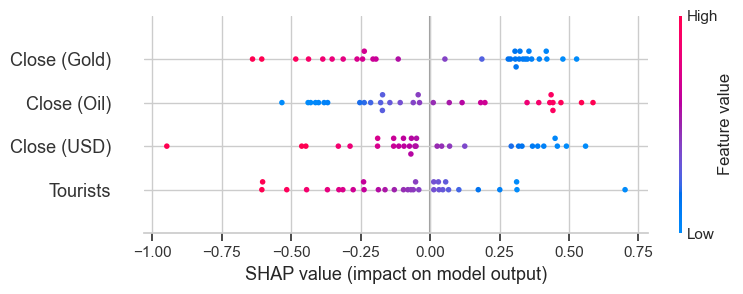

In [78]:
import shap

# Inicjalizacja Explainera SHAP z wytrenowanym modelem
explainer = shap.Explainer(model1, X_train) 

# Obliczenie wartości SHAP
shap_values = explainer(X_test)

# Wyświetlenie wyników
shap.summary_plot(shap_values, X_test)


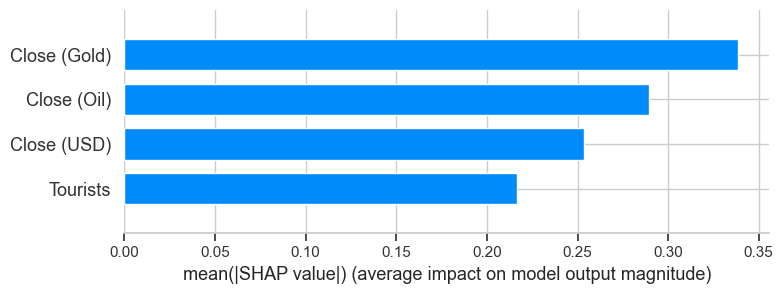

In [79]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

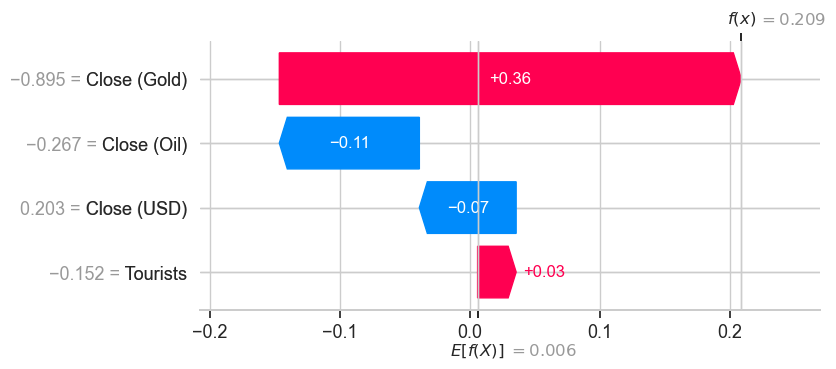

In [80]:
shap.plots.waterfall(shap_values[6])